In [1]:

from process import *
from visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

# How many files from glycoshape are already compatible with glycontact?

In [35]:
### Download full glycoshape except those already downloaded and present in my glycans path
iupac_list = get_glycoshape_IUPAC()

my_glycans_path = "glycans_pdb/"
my_glycans_list = os.listdir(my_glycans_path)


for g in iupac_list:
    if g not in my_glycans_list and 'diacetimido' in g:
        print(g)
        #download_from_glycoshape(g)

Gal(b1-4)Gal(a1-3)[2-4-diacetimido-2-4-6-trideoxyhexose]


In [36]:
#download took 72m

In [6]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
iupac_list = ['GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S']
weird_list = [glycan for glycan in iupac_list if '(' not in glycan or glycan[-1]==']']
print(weird_list)
iupac_list = [glycan for glycan in iupac_list if '(' in glycan and glycan not in weird_list]

print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    if ')' not in g_list[g_index]:
        break
    print(g_list[g_index])
    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        print("PDB error")
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df = explore_threshold(pdb_file, iupac_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        print("MONOSAC ERROR")
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        print("CANNOT BUILD!")
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    else : #try with another PDB file if any available
        for pdb_count in range(1,10):
            print("Retrying " + iupac_list[g_index] + ' with another PDB file...')
            print('Retry nb ' + str(pdb_count))
            try :
                pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[pdb_count]
                df = explore_threshold(pdb_file, iupac_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
                print(df['atom_number'][0])
                errors = 'SUCCESS'
                break
            except :
                df = pd.DataFrame()
                print("Retry failed...")
 
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

[]
1
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
threshold:2.4
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
MODIFIED GLYCAN
RES
{1: 'ROH', 2: 'NDG', 3: 'SO3', 4: 'IDR', 5: 'NDG', 6: 'BDP', 7: 'SO3'}
DISTANCE MAP
              1_ROH_HO1_1  1_ROH_O1_2  2_NDG_C1_3  2_NDG_H1_4  2_NDG_C2_5  \
1_ROH_HO1_1         0.000       0.000       2.753       3.134       4.759   
1_ROH_O1_2          0.000       0.000       2.249       2.656       3.951   
2_NDG_C1_3          2.753       2.249       0.000       0.000       0.000   
2_NDG_H1_4          3.134       2.656       0.000       0.000       0.000   
2_NDG_C2_5          4.759       3.951       0.000       0.000       0.000   
...                   ...         ...         ...         ...         ...   
6_BDP_H2O_97       11.000      11.000      11.000      11.000      11.000   
7_SO3_S1_98        11.000      11.000      11.000      11.000      11.000   
7_SO3_O1_99        11.000      11.000      11.000      

In [3]:
#total glycans : 434 --> new total (August 2nd 2024): 453
success_df = fdf[fdf['success']=='SUCCESS']

In [4]:
success_df #178 -> 274 --> 314 --> 364 --> 364 --> 380

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS
2,GlcNAc(b1-6)GalNAc,SUCCESS
3,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...,SUCCESS
4,Neu5Ac(a2-3)Gal(b1-3)GalNAc,SUCCESS
...,...,...
442,Neu5Ac(a2-3)Gal(b1-3)GlcNAc(a1-3)Gal(b1-4)Glc,SUCCESS
443,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...,SUCCESS
444,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,SUCCESS
445,Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...,SUCCESS


In [55]:
l = success_df['glycan'].to_list()
for g in l :
    if 'S' in g :
        print(g)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
Fuc(a1-2)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
GlcA3S(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6S(a1-4)IdoA2S(a

In [7]:
df

,record_name,atom_number,atom_name,monosaccharide,chain_id,residue_number,x,y,z,occupancy,temperature_factor,element,IUPAC
0,ATOM,1,HO1,ROH,X,1,17.633,18.612,17.169,1.0,0.0,H,-R
1,ATOM,2,O1,ROH,X,1,18.286,19.027,16.605,1.0,0.0,O,-R
31,ATOM,32,O3,NDG6SO3,X,2,16.665,21.659,20.526,1.0,0.0,O,GlcNAc6S(a1-1)
30,ATOM,31,O2,NDG6SO3,X,2,16.481,20.359,22.501,1.0,0.0,O,GlcNAc6S(a1-1)
29,ATOM,30,O1,NDG6SO3,X,2,17.484,22.465,22.586,1.0,0.0,O,GlcNAc6S(a1-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ATOM,80,O5,BDP,X,6,26.708,27.920,27.407,1.0,0.0,O,GlcA(b1-4)
78,ATOM,79,H1,BDP,X,6,27.813,27.022,25.838,1.0,0.0,H,GlcA(b1-4)
77,ATOM,78,C1,BDP,X,6,26.936,27.649,25.973,1.0,0.0,C,GlcA(b1-4)
88,ATOM,89,H4O,BDP,X,6,29.362,31.330,27.649,1.0,0.0,H,GlcA(b1-4)


In [75]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']

In [76]:
unsuccess_df #256 --> 171 --> 131 --> 81 --> 70 --> 73

,glycan,success
27,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...,__CannotBuild
38,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...,__CannotBuild
48,GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-...,__CannotBuild
61,Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a...,__CannotBuild
68,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)...,__CannotBuild
74,GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-...,__CannotBuild
109,Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1...,__CannotBuild
111,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Gal(b1-4)GlcN...,__CannotBuild
119,Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(...,__CannotBuild
121,Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[N...,__CannotBuild


In [77]:
unsuccess_df[unsuccess_df['success']=='__CannotBuild'] #235 --> 142 --> 102 --> 52 --> 63 --> 63

,glycan,success
27,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...,__CannotBuild
38,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...,__CannotBuild
48,GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-...,__CannotBuild
61,Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a...,__CannotBuild
68,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)...,__CannotBuild
74,GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-...,__CannotBuild
109,Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1...,__CannotBuild
111,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Gal(b1-4)GlcN...,__CannotBuild
119,Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(...,__CannotBuild
121,Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[N...,__CannotBuild


In [109]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-

In [ ]:
'''
# Why glycans are still failing :

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc -> unconsistent structure
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> stacked structure, hard to convert without manual annotation
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)Gal(a1-6)]Man
Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc
Man(b1-2)Man(b1-2)Man(a1-2)Man(a1-2)Man(a1-2)Man
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
Neu5Ac9Ac(a2-6)Gal(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-4)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac9Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc
Gal(b1-4)GlcNAc(b1-3)Gal6S(b1-4)GlcNAc6S(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Man(a1-3)[Man(a1-6)]Man(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)[Fuc(a1-3)][Fuc(a1-6)]GlcNAc
Man(a1-3)Man
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA
Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
IdoA(a1-3)GalNAc(b1-4)IdoA2S(a1-3)GalNAc4S(b1-4)IdoA(a1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
'''

In [23]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22 --> 6 --> 8

,glycan,success


In [24]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

In [25]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7 --> 1 --> 2(no PDB on glycoshape)

,glycan,success
136,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...,pdb__CannotBuild
321,GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)Gl...,pdb__CannotBuild


In [16]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions but with different linkage types

In [ ]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('(a2-9)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [ ]:
success_df.sort_values(by ='topological_group')

In [ ]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

In [ ]:
success_df['glycan'][success_df['topological_group']==106].to_list()

In [ ]:
g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)

## silhouette v2 = same shape no matter which sugar occupy which place, just the branching pattern is similar 

In [64]:
from collections import Counter

def convert_glycan_to_X(glycan):
    """
    Converts every monosaccharide(linkage) and single monosaccharide into 'X' in a glycan string.
    
    Parameters:
    - glycan (str): A string representing the glycan in IUPAC format.
    
    Returns:
    - str: The modified glycan string with each monosaccharide replaced by 'X'.
    """
    # Regular expression to match monosaccharide(linkage) or single monosaccharide
    pattern = r'[A-Za-z0-9]+(?:\([^\)]+\))?'

    # Replace each matched pattern with 'X'
    converted_glycan = re.sub(pattern, 'X', glycan)

    return converted_glycan

def group_by_silhouette(glycan_list):
    """
    Take a list of glycans and return a dataframe where they are annotated and sorted by their silhouette.
    Glycans with the same silhouette share the same branching/topology (example: Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc 
    and Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc share the same silhouette: XX[X]X)
    
    Parameters:
    - glycan_list (list): A list of glycans in IUPAC format.
    
    Returns:
    - Dataframe: The annotated dataframe.
    """
    silhouettes = pd.DataFrame()
    topo_groups = [] # groups of same topology/silhouette
    nullified_list = []
    group_list = []

    for g in glycan_list :
        nullified = convert_glycan_to_X(g)
        if nullified in topo_groups :
            group = topo_groups.index(nullified)
        else :
            topo_groups.append(nullified)
            group = topo_groups.index(nullified)
        nullified_list.append(nullified)
        group_list.append(group)

    silhouettes['glycan']=glycan_list
    silhouettes['silhouette']=nullified_list
    silhouettes['topological_group']=group_list

    return silhouettes.sort_values(by ='topological_group')

sil = group_by_silhouette(success_df['glycan'].to_list())
print(sil)
#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(sil['topological_group'].to_list())
print(c.most_common())


                                                glycan  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...   
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...   
85                                  GlcNAc(b1-4)GlcNAc   
93                                  Neu5Ac(a2-6)GalNAc   
117                                       Glc(a1-4)Glc   
..                                                 ...   
405  Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)][GlcNA...   
406  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...   
407  Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...   
409  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...   
413  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...   

                  silhouette  topological_group  
0    XXX[XXX]X[XXX[XXX]X]XXX                  0  
1                X[X]XX[X]XX                  1  
85                        XX                  2  
93                        XX                  2  
117                       XX                  2  
.. 

In [65]:
success_df['glycan'][success_df['topological_group']==21].to_list()

['GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS',
 'Neu5Gc(a2-8)Neu5Gc(a2-3)Gal(b1-4)Glc',
 'GalNAc(b1-3)Gal(a1-4)Gal(b1-4)Glc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc',
 'GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S',
 'Neu5Ac(a2-3)Gal(a1-4)Gal(b1-4)Glc',
 'Neu5Ac(a2-6)Gal(a1-4)Gal(b1-4)Glc',
 'Neu5Gc(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man',
 'Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S',
 'Fuc(a1-2)Gal(b1-4)Glc(a1-3)Fuc',
 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-3)Gal',
 'Neu5Ac(a2-8)Neu5Gc(a2-3)Gal(b1-4)Glc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc6S',
 'Fuc(a1-2)Gal(a1-3)Gal(b1-3)GalNAc',
 'GlcA3S(b1-3)Gal(b1-3)Gal(b1-4)Xyl',
 'GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S',
 'GlcA(b1-3)Gal(b1-4)GlcNAc(b1-2)Man',
 'Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc',
 'Neu5Ac(a2-3)Gal(b1-3)GlcNAc(b1-2)Man',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man',
 'Gal(b1-4)Glc

In [66]:
g_with_major, g_without_major = glycan_cluster_pattern(threshold = 50) 
print("Glycans with one major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_with_major :
        print(g + ' ' + str(get_glycan_clusters_frequency(g)))

print("\nGlycans without a major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_without_major :
        print(g + ' ' + str(get_glycan_clusters_frequency(g)))

Number of glycans with one major cluster: 104
Number of glycans without a major cluster: 344
Glycans with one major cluster:

GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc [51.04, 23.5, 8.65, 6.53, 5.92, 4.36]
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S [50.01, 24.94, 15.52, 9.54]
Neu5Gc(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc [66.9, 16.76, 16.34]
Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc [50.57, 18.88, 17.66, 12.9]
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S [61.85, 21.66, 16.49]
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc [57.61, 28.65, 11.62, 2.11]
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S [63.77, 14.21, 13.14, 8.88]
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man [50.54, 27.39, 22.07]
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-3)Fuc [56.98, 27.06, 15.96]
GlcA3S(b1-3)Gal(b1-4)GlcNAc(b1-2)Man [60.7, 21.49, 11.59, 6.22]
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc [79.31, 20.69]

Glycans without a major cluster:

GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS [29.76, 27.75, 18.69, 14.87, 4.8, 4.13]
Neu5Gc(a2-8)Neu5Gc(a2-3)Gal(b1-4)Glc [42.21, 26.26, 

# Building distance tables and other metrics per glycan groups

In [ ]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold("glycans_pdb/"+g+"/"+f,g, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

In [ ]:
monosaccharide_contact_map(isvt)

In [ ]:
monosaccharide_contact_map(isvt_amplified)

In [ ]:
atom_contact_map(atom_isvt,size =0.2)

In [ ]:
atom_contact_map(atom_isvt_amplified,size =0.2)

In [ ]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

In [ ]:
show_correlation_dendrogram(mx, font_size = 7)

In [ ]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

In [ ]:
#beta
alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold(f.split('_')[0]+'/'+ f, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

In [ ]:
monosaccharide_contact_map(isvt)

In [ ]:
monosaccharide_contact_map(isvt_amplified)

In [ ]:
atom_contact_map(atom_isvt,size =0.2)

In [ ]:
atom_contact_map(atom_isvt_amplified,size =0.2)

In [ ]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

In [ ]:
def show_correlation_dendrogram(corr_df, font_size = 1):
    ### Create a hierarchical clustering dendrogram from a correlation matrix as dataframe (corr_df)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(corr_df.values, method='ward'),
                                    labels=corr_df.columns,
                                    leaf_rotation=90,
                                    leaf_font_size=8,ax=ax
                                    )
    for d in dendrogram :
        print(d + str(dendrogram[d]))
    monolist = dendrogram['ivl']
    clustlist = dendrogram['leaves_color_list']
    uniclustlist =list(set(clustlist))
    res_dict = {}
    #Create a dict with the correlated clusters (=colors on dendrogram) --> 3D regions of glycans highly correlated 
    for c in uniclustlist :
        res_dict[c] = []
    for x in range(0,len(monolist)):
        res_dict[clustlist[x]].append(monolist[x])
    print(res_dict)
    ax.tick_params(axis='x', which='major', labelsize=font_size)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Residue')
    plt.ylabel('Distance')
    plt.show()
    return(res_dict)

show_correlation_dendrogram(mx)

In [ ]:
show_correlation_dendrogram(mx, font_size = 7)

In [ ]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Try a pipeline using a2-3 and a2-6 Neu5Ac()

In [ ]:
success_list = success_df['glycan'].to_list()
to_process_list = []
for g in success_list :
    if 'a2-3' in g and 'a2-6' in g : 
        to_process_list.append(g)

print(to_process_list)

In [ ]:
#manual to_process_list
to_process_list = ['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

In [ ]:
g = to_process_list[10]
#g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)
#alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]

# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold("glycans_pdb/"+g+"/"+f,g, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs.append(dist_table)


In [ ]:
g

In [ ]:
isft = inter_structure_frequency_table(dfs, threshold = 7)
monosaccharide_contact_map(isft)

In [ ]:
isft

In [ ]:
isvt = inter_structure_variability_table(dfs, mode = 'amplify')
monosaccharide_contact_map(isvt)

In [ ]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

In [ ]:
show_correlation_dendrogram(mx, font_size = 7)

In [ ]:
residue_overall_stability = {}
for c in isvt.columns.to_list():
    residue_overall_stability[c] = sum(isvt[c].to_list())

sorted_residue_overall_stability = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability)

In [ ]:
### BETA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g+'monosaccharide_instabilities.pdf')

plt.show()

In [ ]:
### ALPHA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g+'alpha_monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g+'alpha_monosaccharide_instabilities.pdf')

plt.show()

# Investigation of failing glycans

In [ ]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

In [ ]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list() #1
for gly in g :
    print(gly)


In [ ]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

In [ ]:

#Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> weird structure on Glycoshape

In [80]:




def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine

  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  n_glycan = False
  if 'Man(b1-4)GlcNAc(b1-4)' in glycan :
    n_glycan = True
  #print(glycan_sequence)

  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  #print(valid_fragments)

  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(pdb_file,threshold)
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments, n_glycan)
  print(mapping_dict)
  print(interaction_dict)
  #print(len(mapping_dict))
  #print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list (binary interactions):" + str(result_list))
  
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  glycowork_glycontact_agree, interactions_with_labels = glycowork_vs_glycontact_interactions(interactions_with_labels, result_list)
  if glycowork_glycontact_agree == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(extract_3D_coordinates(pdb_file))
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)

def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())
  


In [ ]:
def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    coordinates_df =  correct_dataframe(extract_3D_coordinates(pdb_file))
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

In [ ]:
def create_mapping_dict_and_interactions(df, valid_fragments) :
  #df is an interaction dataframe as returned by extract_binary_interactions_from_PDB()
  # valid_fragments : obtained from glycowork to ensure that we only append valid monolinks into mapping dict
  mapping_dict = {}
  interaction_dict = {}
  interaction_dict2 = {}
  first_mono_list = df['Atom'].to_list()
  second_mono_list = df['Column'].to_list()
  mapping_dict['1_ROH']='-R'
  wrong_mannose = []
  individual_entities = []

  for m in range(0,len(first_mono_list)) :

    mono = first_mono_list[m].replace("_"+first_mono_list[m].split('_')[-1],'')
    second_mono = second_mono_list[m].replace("_"+second_mono_list[m].split('_')[-1],'')
    first_val = first_mono_list[m].split('_')[-1]
    first_val = extract_numbers(first_val)
    last_val = extract_numbers(second_mono_list[m].split('_')[-1])
    if mono not in individual_entities:
      individual_entities.append(mono)
    if second_mono not in individual_entities:
      individual_entities.append(second_mono)

    if mono.split('_')[1] + '(' + first_val + '-' + last_val + ')' == "MAN(1-4)":
      wrong_mannose.append(mono)

    if second_mono in wrong_mannose :
      second_mono = second_mono.split('_')[0]+"_BMA"

    if mono in wrong_mannose :
      mono = mono.split('_')[0]+"_BMA"
    mapped_to_check = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    #print("mapped_to_check:" + str(mapped_to_check))

    if mapped_to_check in valid_fragments :
      mapping_dict[mono] = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    if mapped_to_check == 'Man(a1-4)':
      mapping_dict[mono] = 'Man(b1-4)'
    if mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check == '-R' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
      mapping_dict[mono] = mapped_to_check


    if mono in interaction_dict :
      if second_mono not in interaction_dict[mono] :
        interaction_dict[mono].append(second_mono)
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']
        interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono] #added but eventually wrong, make everything else fail later
    if mono not in interaction_dict :
      if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
        interaction_dict[mono] = [second_mono]
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'].append(second_mono)

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' not in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono]

  return(mapping_dict, interaction_dict2)

In [ ]:
def glycowork_vs_glycontact_interactions(glycowork_interactions, glycontact_interactions) :
  # Take two sets of binary interactions to compare them and return any difference other than GlcNAc-a1-1 and a1-1-R (only considered by glycontact)

  # Convert the lists to sets for easy comparison
  result_set = set(glycontact_interactions)
  interactions_set = set(glycowork_interactions)

  # Calculate the differences
  differences = result_set.symmetric_difference(interactions_set)

  # Convert the differences set back to a list of tuples
  differences_list = list(differences)

  # Pairs to be ignored because specific to glycontact
  ignore_pairs = {('GlcNAc', 'a1-1'), ('a1-1', ' '),('GlcNAc', 'b1-1'), ('b1-1', ' '), ('GalNAc', 'a1-1'), ('GalNAc', 'b1-1'), ('Glc', 'a1-1'), ('Glc', 'b1-1'), ('Rha', 'b1-1'), ('Rha', 'a1-1'), ('Neu5Ac', 'b1-1'), ('Neu5Ac', 'a1-1'), ('Man', 'b1-1'), ('Man', 'a1-1'), ('Gal', 'b1-1'), ('Gal', 'a1-1'), ('Fuc', 'b1-1'), ('Fuc', 'a1-1'), ('Xyl', 'b1-1'), ('Xyl', 'a1-1'), ('GlcA', 'a1-1'), ('GlcA', 'b1-1')}

  # Filter out pairs to be ignored
  filtered_differences = [pair for pair in differences_list if pair not in ignore_pairs]

  # Print or use the filtered_differences as needed
  #print("Filtered Differences:", filtered_differences)
  if filtered_differences == [] and  (len(glycontact_interactions) > len(glycowork_interactions)):
    return(True)
  else :
    if filtered_differences != [] :
      #print('Differences in annotations')
      #print(glycowork_interactions)
      #print(glycontact_interactions)
      return(False)
    if (len(glycontact_interactions) <= len(glycowork_interactions)) :
      #print("Missing monosaccharide in mapping_dict")
      return(False)

In [ ]:
def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  #Correcting GLC to GalNAc
  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

In [ ]:
glycan = "Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

In [ ]:
mono = df['monosaccharide'].to_list()
IUPAC = df['IUPAC'].to_list()

for x in range(0,len(mono)):
    print(mono[x],IUPAC[x])

In [ ]:
print(df['atom_number'][0])

In [ ]:
df2 = extract_3D_coordinates(pdb_file)

In [ ]:
dist_table = make_monosaccharide_contact_table(df,mode='distance')
monosaccharide_contact_map(dist_table)

# Working on Modified (sulfated...) glycans

In [19]:
glycan = "GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS"
#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
#df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS_beta_5.pdb


In [20]:
df2 = extract_3D_coordinates(pdb_file)
print(list(set(df2['monosaccharide'].to_list())))

['ROH', '4YS', 'BDP', 'SO3']


In [21]:
### Strat: detect which component are not monosaccharides.
### For each of them, detect the closest monosaccharide.
### Detect the type of linkage between monosaccharide and modification (to know if it is 6S, 3S...)
### Annotate each non-monosaccharide and its linked monosaccharide with custom annotation in monosaccharide column
### GlcNAc6S : NAG + SO3 + C6-S1 linkage : NAG6S (residue_number = monosaccharide residue number)

# In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
modified_mono = ["GlcNAc6S", "GalNAc4S", "IdoA2S", "GlcA3S", "GlcA2S", "Neu5Ac9Ac", 
                 "Man3Me", "Neu5Ac9Me", "Neu5Gc9Me", "GlcA4Me", "Gal6S", "GlcNAc6Pc",
                 "GlcNS6S"
                 ]
### note: GalNAcXS will be annotated as GLC as well, so I need to correct it as well

# List of non-monosaccharide
non_mono_list=['SO3', 'ACX', 'MEX', 'PCX']

# Dict of modifications {link_modif:IUPAC} 
#modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

# Custom PDB codes to IUPAC (check GLC/GalNAc thingy)
custom_pdb = {"NAG6SO3":"GlcNAc6S", "NDG6SO3":"GlcNAc6S", "GLC4SO3":"GalNAc4S", "IDR2SO3":"IdoA2S", 
              "BDP3SO3":"GlcA3S", "BDP2SO3":"GlcA2S", "SIA9ACX":"Neu5Ac9Ac", "MAN3MEX":"Man3Me", 
              "SIA9MEX":"Neu5Ac9Me", "NGC9MEX":"Neu5Gc9Me", "BDP4MEX":"GlcA4Me", "GAL6SO3":"Gal6S", 
              "NAG6PCX":"GlcNAc6Pc", "UYS6SO3":"GlcNS6S", "4YS6SO3":"GlcNS6S", "6YS6SO3":"GlcNS6S"}

# To modify dict
to_modify_dict = {}

modified_glycan = False 
for mm in modified_mono :
    if mm in glycan : 
        modified_glycan = True

if modified_glycan == True :
    pdb_path = "glycans_pdb/"+glycan
    pdbs = check_available_pdb(pdb_path)

    pdb_file = pdb_path + "/" + pdbs[0]
    print(pdb_file)

    df = extract_3D_coordinates(pdb_file)

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono
    print(resdict)

    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            
            split_index = contact_table.index.str.split('_')

            # créer un masque pour filtrer les lignes dont le troisième élément ne contient pas "H"
            mask = ['H' not in x[2] for x in split_index]

            # filtrer les lignes de la dataframe en utilisant le masque
            filtered_table = contact_table.loc[mask]

            partners = filtered_table[filtered_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]
            print(sugar_partner)

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            #link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            link_pos = str(re.findall(r'\d+', atom)[0])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]


            print(link_pos)
            print(modif)
            print(modified_mono)
            print(modified_mono_iupac)
            print("stop")

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]

print(to_modify_dict)


# charger la dataframe à partir du fichier file.pdb
df = extract_3D_coordinates(pdb_file)

# parcourir chaque ligne de la dataframe et appliquer les règles
for index, row in df.iterrows():
    residue_number = row['residue_number']
    if residue_number in to_modify_dict:
        if type(to_modify_dict[residue_number]) is str : 
            monosaccharide = to_modify_dict[residue_number]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
        
        if type(to_modify_dict[residue_number]) is list:
            monosaccharide = to_modify_dict[residue_number][0]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
            new_residue_number = int(to_modify_dict[residue_number][1])
            df.at[index, 'residue_number'] = new_residue_number

# conserver la dataframe modifiée en variable
df_modified = df.copy()
new_df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

# afficher le résultat
##print("Nom de la colonne :", col_name)
#print("Index de la ligne :", row_index)


        




glycans_pdb/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS_beta_5.pdb
{1: 'ROH', 2: '4YS', 3: 'BDP', 4: '4YS', 5: 'BDP', 6: 'SO3'}
3_BDP_O2_45
2
2SO3
BDP2SO3
GlcA2S
stop
{3: 'BDP2SO3', 6: ['BDP2SO3', '3']}
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3


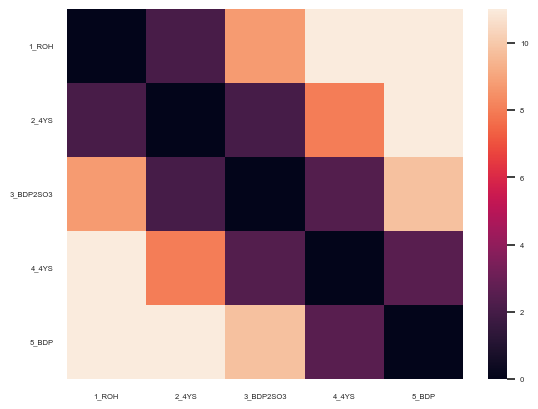

In [22]:
dist_table = make_monosaccharide_contact_table(new_df, mode="distance")
monosaccharide_contact_map(dist_table)

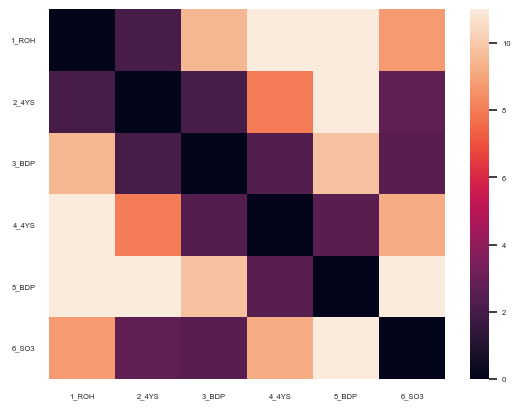

In [23]:
dist_table = make_monosaccharide_contact_table(df2, mode="distance")
monosaccharide_contact_map(dist_table)

In [ ]:
dist_table = make_atom_contact_table(new_df)
monosaccharide_contact_map(dist_table)

In [ ]:
dist_table = make_atom_contact_table(df2)
monosaccharide_contact_map(dist_table)

# New annotation pipeline

## Continue here, check why some are still failing with modified monosacs

In [52]:

def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    print(interactions_df)
    return interactions_df

def annotate_pdb_data(pdb_dataframe, mapping_dict) :
  mono_list = pdb_dataframe['monosaccharide'].to_list()
  id_list = pdb_dataframe['residue_number'].to_list()
  m_dict = copy.deepcopy(mapping_dict)
  for m in m_dict :
    if "BMA" in m :
      mapping_dict[m.split('_')[0]+"_"+"MAN"] = mapping_dict[m] #restore the corrected mannose into a wrong one for annotation
  IUPAC = []
  for m in range(0,len(mono_list)):
    monosaccharide = str(id_list[m]) + "_" + mono_list[m]
    try :
      IUPAC.append(mapping_dict[monosaccharide])
    except :
      IUPAC.append(mono_list[m])
  pdb_dataframe['IUPAC']= IUPAC
  return(pdb_dataframe)

def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine


  # In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
  modified_mono = ["GlcNAc6S", "GalNAc4S", "IdoA2S", "GlcA3S", "GlcA2S", "Neu5Ac9Ac", 
                  "Man3Me", "Neu5Ac9Me", "Neu5Gc9Me", "GlcA4Me", "Gal6S", "GlcNAc6Pc",
                  "GlcNS6S"
                  ]
  ### note: GalNAcXS will be annotated as GLC as well, so I need to correct it as well

  # List of non-monosaccharide
  non_mono_list=['SO3', 'ACX', 'MEX', 'PCX']

  # Dict of modifications {link_modif:IUPAC} 
  #modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

  # Custom PDB codes to IUPAC (check GLC/GalNAc thingy)
  custom_pdb = {"NAG6SO3":"GlcNAc6S", "NDG6SO3":"GlcNAc6S", "GLC4SO3":"GalNAc4S", "IDR2SO3":"IdoA2S", 
                "BDP3SO3":"GlcA3S", "BDP2SO3":"GlcA2S", "SIA9ACX":"Neu5Ac9Ac", "MAN3MEX":"Man3Me", 
                "SIA9MEX":"Neu5Ac9Me", "NGC9MEX":"Neu5Gc9Me", "BDP4MEX":"GlcA4Me", "GAL6SO3":"Gal6S", 
                "NAG6PCX":"GlcNAc6Pc", "UYS6SO3":"GlcNS6S", "4YS6SO3":"GlcNS6S", "6YS6SO3":"GlcNS6S"}
  
  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  #print(glycan_sequence)


  # To modify dict
  to_modify_dict = {}

  df = extract_3D_coordinates(pdb_file)

  modified_glycan = False 
  for mm in modified_mono :
      if mm in glycan_sequence : 
          modified_glycan = True

  if modified_glycan == True :
    print("MODIFIED GLYCAN")

    

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono


    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            
            split_index = contact_table.index.str.split('_')

            # créer un masque pour filtrer les lignes dont le troisième élément ne contient pas "H"
            mask = ['H' not in x[2] for x in split_index]

            # filtrer les lignes de la dataframe en utilisant le masque
            filtered_table = contact_table.loc[mask]

            partners = filtered_table[filtered_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            #link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            link_pos = str(re.findall(r'\d+', atom)[0])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]

            #print(link_pos)
            #print(modif)
            #print(modified_mono)
            #print(modified_mono_iupac)

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]




    # charger la dataframe à partir du fichier file.pdb
    df = extract_3D_coordinates(pdb_file)

    # parcourir chaque ligne de la dataframe et appliquer les règles
    for index, row in df.iterrows():
        residue_number = row['residue_number']
        if residue_number in to_modify_dict:
            if type(to_modify_dict[residue_number]) is str : 
                monosaccharide = to_modify_dict[residue_number]
                df.at[index, 'monosaccharide'] = monosaccharide
            
            if type(to_modify_dict[residue_number]) is list:
                monosaccharide = to_modify_dict[residue_number][0]
                df.at[index, 'monosaccharide'] = monosaccharide
                new_residue_number = int(to_modify_dict[residue_number][1])
                df.at[index, 'residue_number'] = new_residue_number

    # conserver la dataframe modifiée en variable
    df_modified = df.copy()
    df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

  
  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  print(valid_fragments)
  print(list(set(df['monosaccharide'].to_list())))
  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(df,threshold)
  print("BinInt Extracted --->>><<<")
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments)
  print(mapping_dict)
  print(interaction_dict)
  print(len(mapping_dict))
  print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list:" + str(result_list))
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  if glycowork_vs_glycontact_interactions(interactions_with_labels, result_list) == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(df)
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)


def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())

In [53]:
glycan_list = ["Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose","GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA",
               "Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S",
               "GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl","GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl"]



In [54]:
#glycan_list = ['Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS']
success_fail_list = []
x =1

for g_index in range(0,len(glycan_list)) :

    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + glycan_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + glycan_list[g_index] + "/" + pdbs[0]
    except :
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        print(glycan_list[g_index])
        df = explore_threshold(pdb_file, glycan_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
        print("DONE")
    except :
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = glycan_list
fdf['success'] = success_fail_list 

Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose
threshold:2.4
['Gal(b1-4)', 'Gal(a1-3)']
['GAL', 'ROH', 'BCA', 'GLA']
       Atom    Column  Value
0  2_BCA_C1  1_ROH_O1  2.346
BinInt Extracted --->>><<<
['2_BCA_C1']
['1_ROH_O1']
2_BCA
1_ROH
C1
1
A
B
mapped_to_check:2-4-diacetimido-2-4-6-trideoxyhexose(a1-1)
['Gal(b1-4)', 'Gal(a1-3)']
{'1_ROH': '-R', '2_BCA': '2-4-diacetimido-2-4-6-trideoxyhexose(a1-1)'}
{'2_BCA': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH']}
2
2
[('Gal', 'b1-4'), ('b1-4', 'Gal'), ('Gal', 'a1-3'), ('a1-3', '2-4-diacetimido-2-4-6-trideoxyhexose')]
result list:[('2-4-diacetimido-2-4-6-trideoxyhexose', 'a1-1'), ('a1-1', ' ')]
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
['Gal(b1-4)', 'Gal(a1-3)']
['GAL', 'ROH', 'BCA', 'GLA']
       Atom    Column  Value
0  2_BCA_C1  1_ROH_O1  2.346
BinInt Extracted --->>><<<
['

In [57]:
fdf['glycan'][fdf['success']=='SUCCESS'].to_list()

['Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose',
 'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S',
 'GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl']

In [ ]:
#drawing publication-quality glycan figures
#!/usr/local/bin/python3.12.1

from glycowork.motif import *
from glycowork.motif.draw import GlycoDraw
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc")

In [ ]:
import MDAnalysis as mda
import mdtraj as md
from mdtraj.core.topology import Topology
from mdtraj.core.trajectory import Trajectory


# Load PDB file
pdb_file = "/Users/lucthomes/Desktop/REPOSITORIES/Glycontact/glycans_pdb/" + g + "/" + pdbs[0]


# Load the PDB file
structure = md.load(pdb_file)

# Calculate SASA
sasa = md.shrake_rupley(structure, mode='atom')

# Print the SASA for each atom
highest = ''
highval = 0
for i, atom_sasa in enumerate(sasa[0]):
    atom = structure.topology.atom(i)
    print(f"Atom {atom.name} ({atom.residue.name} {atom.residue.resSeq}): {atom_sasa} Å²")
    if atom_sasa > highval :
        highval = atom_sasa
        highest = str(atom.name) +'_'+ str(atom.residue.name) + '_' +  str(atom.residue.resSeq)

    



In [ ]:
glycan = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
res = get_sasa_table(glycan)

In [ ]:
res

In [ ]:



score_list = res['Standard Deviation'].to_list()
plot_glycan_score(glycan, score_list)


In [ ]:
lst = res['Mean Score'].to_list()


In [ ]:
lst = res['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(glycan, per_residue= normalized_lst)

In [ ]:


lst = table['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g, per_residue= normalized_lst)

In [ ]:
GlycoDraw(g, draw_method='chem2d')

In [ ]:
GlycoDraw(g, draw_method='chem2d')

# Test a complete analysis of two given glycans :
- Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
- Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

In [ ]:
import mdtraj as md
import numpy as np
import pandas as pd

g1 = "Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"
g2 = "Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

pdbs1 = check_available_pdb("glycans_pdb/"+g1)
pdbs2 = check_available_pdb("glycans_pdb/"+g2)

beta_pdbs1 = [pdb for pdb in pdbs1 if 'beta' in pdb]


beta_pdbs2 = [pdb for pdb in pdbs2 if 'beta' in pdb]


# read all structures and get contact maps
dfs1 = []
atom_dfs1 = []
for f in beta_pdbs1 :
    df = explore_threshold("glycans_pdb/"+g1+"/"+f,g1, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs1.append(dist_table)
mapping_dict1 = df.set_index('residue_number')['IUPAC'].to_dict()


dfs2 = []
atom_dfs2 = []
for f in beta_pdbs2 :
    df = explore_threshold("glycans_pdb/"+g2+"/"+f,g2, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs2.append(dist_table)
mapping_dict2 = df.set_index('residue_number')['IUPAC'].to_dict()


In [ ]:
# Need for weighted analyzes based on cluster frequencies

isft1 = inter_structure_frequency_table(dfs1, threshold = 3)
monosaccharide_contact_map(isft1)

In [ ]:
isft2 = inter_structure_frequency_table(dfs2, threshold = 3)
monosaccharide_contact_map(isft2)

In [ ]:
isvt1 = inter_structure_variability_table(dfs1, mode = 'amplify')
monosaccharide_contact_map(isvt1)

In [ ]:
isvt2 = inter_structure_variability_table(dfs2, mode = 'amplify')
monosaccharide_contact_map(isvt2)

In [ ]:
mx1 = make_correlation_matrix(dfs1)
show_correlations(mx1)

In [ ]:
show_correlation_dendrogram(mx1, font_size = 7)

In [ ]:
mx2 = make_correlation_matrix(dfs2)
show_correlations(mx2)

In [ ]:
show_correlation_dendrogram(mx2, font_size = 7)

In [ ]:
residue_overall_stability = {}
for c in isvt1.columns.to_list():
    residue_overall_stability[c] = sum(isvt1[c].to_list())

sorted_residue_overall_stability1 = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability1)

In [ ]:
residue_overall_stability = {}
for c in isvt2.columns.to_list():
    residue_overall_stability[c] = sum(isvt2[c].to_list())

sorted_residue_overall_stability2 = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability2)

In [ ]:
### BETA
labels, values = zip(*sorted_residue_overall_stability1)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g1+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g1+'monosaccharide_instabilities.pdf')

plt.show()

In [ ]:
### BETA
labels, values = zip(*sorted_residue_overall_stability2)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g2+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g2+'monosaccharide_instabilities.pdf')

plt.show()

In [ ]:
beta_pdbs1

In [ ]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['totest.pdb', 'totest2.pdb', 'totest3.pdb']
pdb_files = ["glycans_pdb/"+g1+"/"+p for p in beta_pdbs1]

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:

    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
    weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table)


In [ ]:
def remap_SASA(SASAdf,mapping_dict):
    SASAdf['Monosaccharide'] = SASAdf['Monosaccharide_id'].map(mapping_dict)
    return(SASAdf)

table = remap_SASA(table,mapping_dict1)


In [ ]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['totest.pdb', 'totest2.pdb', 'totest3.pdb']
pdb_files = ["glycans_pdb/"+g2+"/"+p for p in beta_pdbs2]

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:

    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
    weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table2 = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table2)


In [ ]:
table2 = remap_SASA(table2,mapping_dict2)

In [ ]:
from glycowork.motif import *
from glycowork.motif.draw import GlycoDraw
lst = table['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g1, per_residue= normalized_lst)

In [ ]:

lst = table['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g1, per_residue= normalized_lst)

In [ ]:
lst = table2['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g2, per_residue= normalized_lst)

In [ ]:
lst = table2['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g2, per_residue= normalized_lst)

In [ ]:
table

In [ ]:
table2

# Get cluster frequencies + Analysis

In [ ]:
import requests
import json

# Send a GET request to the URL
response = requests.get("https://glycoshape.org/database/GLYCOSHAPE.json")

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()

    # Extract the IUPAC sequence and cluster values
    for key, value in data.items():
        iupac_sequence = value["iupac"]
        clusters = value["clusters"]
        print(f"ID: {key}")
        print(f"IUPAC sequence: {iupac_sequence}")
        print("Cluster values:")
        for cluster, cluster_value in clusters.items():
            print(f"{cluster}: {cluster_value}")
        print("\n")
else:
    print("Failed to retrieve data from the URL.")


In [ ]:
iupac_sequence

In [ ]:
import requests
import json

def get_all_clusters_frequency():
    # Send a GET request to the URL
    response = requests.get("https://glycoshape.org/database/GLYCOSHAPE.json")

    # Initialize an empty dictionary to store the data
    data_dict = {}

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON data
        data = response.json()

        # Extract the IUPAC sequence and cluster values
        for key, value in data.items():
            iupac_sequence = value["iupac"]
            clusters = [value["clusters"][key] for key in value["clusters"]]
            data_dict[iupac_sequence] = clusters
    else:
        print("Failed to retrieve data from the URL.")

    # Print the dictionary
    print(data_dict)
    return(data_dict)

def get_glycan_clusters_frequency(glycan):
    all_frequencies = get_all_clusters_frequency()
    return(all_frequencies[glycan])

get_glycan_clusters_frequency(iupac_sequence)

In [ ]:
#get glycans for which there is one major cluster vs others
all_frequencies = get_all_clusters_frequency()

glycans_with_major_cluster = []
glycans_without_major_cluster = []

for key in all_frequencies :
    try :
        nb_clust = len(all_frequencies[key])
        #print(100/nb_clust)
        if float(all_frequencies[key][0]) > 70:
            glycans_with_major_cluster.append(key)
            print(key+ ' ' + str(all_frequencies[key][0]))
        else :
            glycans_without_major_cluster.append(key)
    except:
        pass

print(len(glycans_with_major_cluster))
print(len(glycans_without_major_cluster))


In [ ]:
#function to determine 1-many cluster glycans
def glycan_cluster_pattern(threshold = 70) :
    # threshold is the proportion the first cluster must have to be considered as a unique major cluster
    # If the first cluster proportion is lower, then this glycan is assumed to be represented by multiple structural clusters
    
    all_frequencies = get_all_clusters_frequency()

    glycans_with_major_cluster = []
    glycans_without_major_cluster = []

    for key in all_frequencies :
        try :
            nb_clust = len(all_frequencies[key])
            #print(100/nb_clust)
            if float(all_frequencies[key][0]) >= threshold:
                glycans_with_major_cluster.append(key)
            else :
                glycans_without_major_cluster.append(key)
        except:
            pass
    
    print("Number of glycans with one major cluster: " + str(len(glycans_with_major_cluster)))
    print("Number of glycans without a major cluster: " + str(len(glycans_without_major_cluster)))

    return(glycans_with_major_cluster,glycans_without_major_cluster)

glycan_cluster_pattern()

In [ ]:
from glycowork.motif.draw import GlycoDraw
for g in glycans_with_major_cluster:
    print(g)


In [ ]:
GlycoDraw('Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc')

In [ ]:
for g in glycans_without_major_cluster:
    print(g)